# Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.
Tasks
- Load this file (np.load) and complete a quick exploration of the data. How many modes do you think you see?

- We'll use sklearn.mixture.GaussianMixture. You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

Note. We'll do a more formal introduction to scikit-learn in one of the next lectures. Today's exercise is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens all the time in research...

- Complete the fit 10 times with N=1...10 Gaussians.
Note: sklearn by default will use the so-called Expectation-Maximization algorithm, which is one of the many great things in data science we don't have time to study in this class.

- For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot N vs AIC: which model is preferred?

- Plot the preferred solution on top of the input data. You should get a very nice fit!
- Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset.

In [1]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile at 75 - quantile at 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

**Istogram of the dataset** 

/tmp/ipykernel_874/195771054.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(N+2)


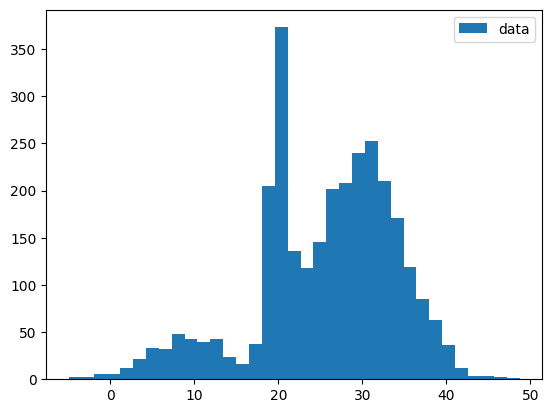

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

data = np.load("formationchannels.npy")

bins = bins_num(data)

plt.hist(data, bins, label = "data")
plt.legend()
plt.show()

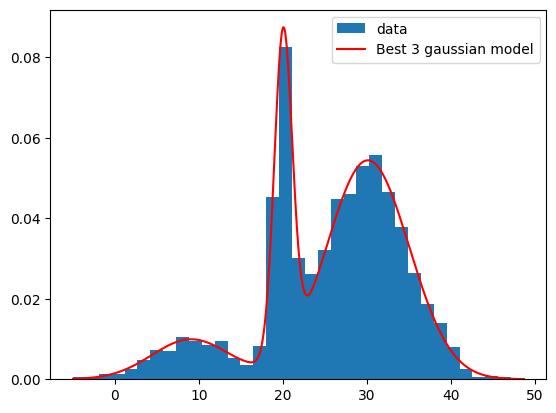

In [3]:
gm = sklearn.mixture.GaussianMixture(n_components=3, random_state=42) # define a 3 gaussian model
gm.fit(data)    #find the best 3 gaussian that fit the data

x = np.linspace(data.min(), data.max(), 1000).reshape(-1,1) #reshape is us to put in "vertical" the array
pdf = np.exp(gm.score_samples(x))  # score_sample gave us the log likelihood for each point, 
# I could use score, that gave the result for the entire model and not for each point

plt.hist(data, bins, density=True, label ="data") #normalizzation, because same is the model
plt.plot(x,pdf, color = "red", label = "Best 3 gaussian model")
plt.legend()
plt.show()

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are two criteria used to compare statistical models and choose the best one. They are particularly useful in the context of Gaussian Mixture Models (GMMs) to determine the optimal number of components (Gaussians).

AIC balances the goodness of fit of the model (likelihood) and its complexity. Models with more parameters may fit the data better but are at risk of overfitting.

BIC is similar to AIC but penalizes complexity more heavily. BIC includes a term that increases with the amount of data, so it tends to favor simpler models compared to AIC, especially when the dataset is large.

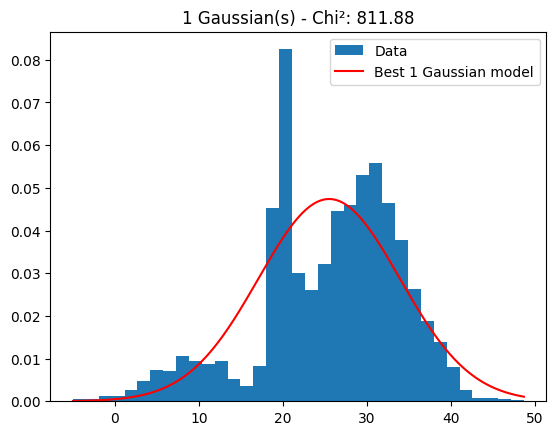

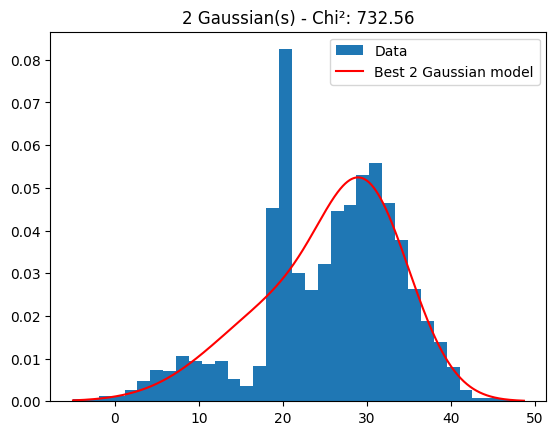

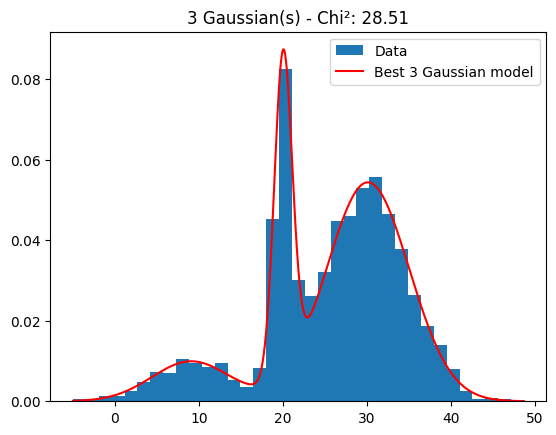

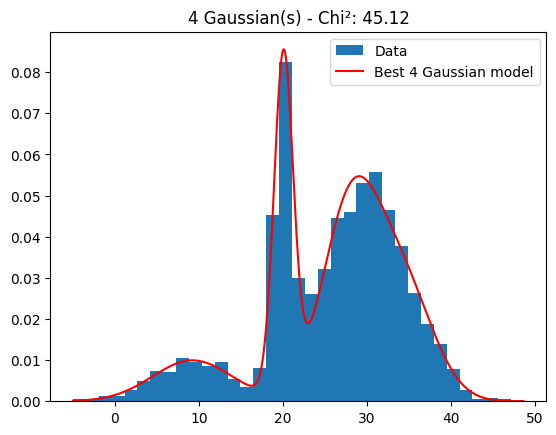

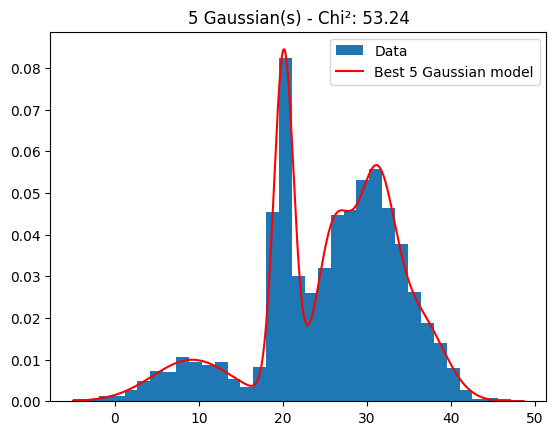

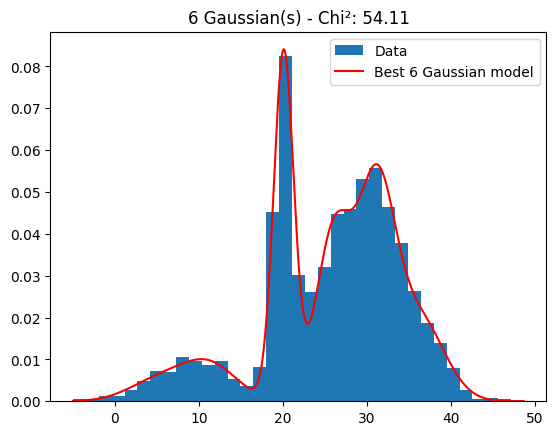

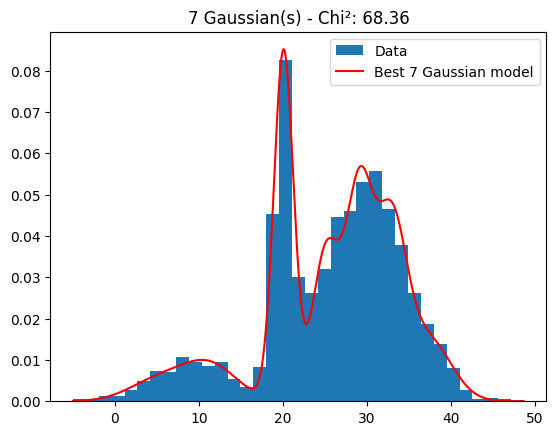

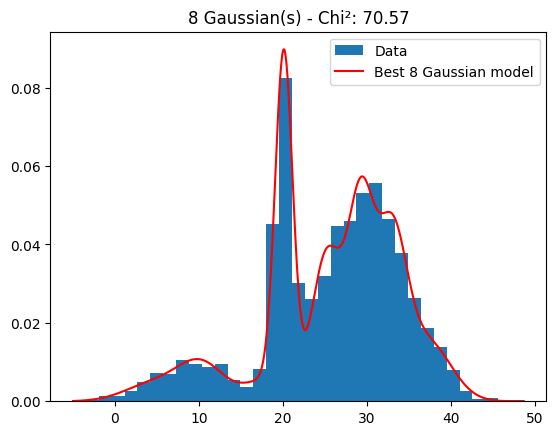

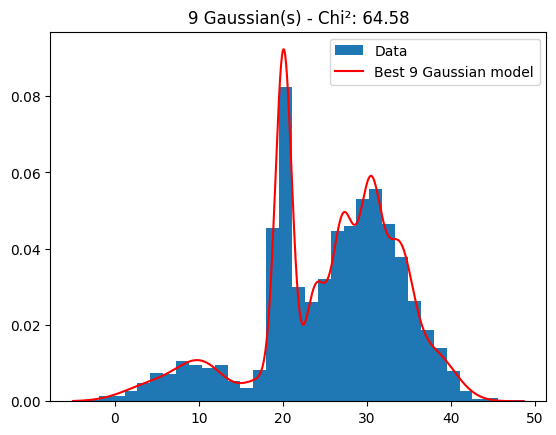

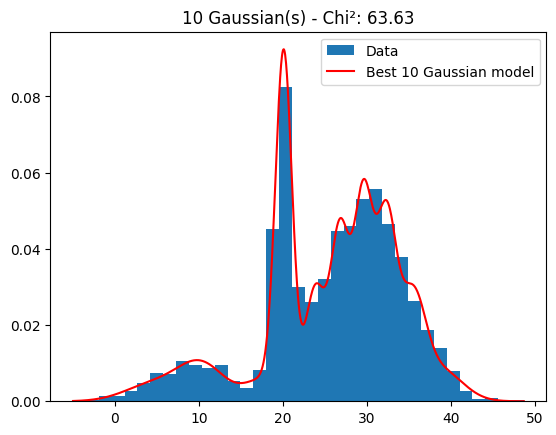

In [ ]:
AIC = []
BIC = []

for i in range(10):  # as before but with a i+1 Gaussian model
    gm = sklearn.mixture.GaussianMixture(n_components=i+1, random_state=42)
    gm.fit(data)

    x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
    pdf = np.exp(gm.score_samples(x))

    # Histogram data
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width = bin_edges[1] - bin_edges[0]

    # Evaluate GMM pdf at bin centers
    expected_density = np.exp(gm.score_samples(bin_centers.reshape(-1, 1)))
    expected_counts = expected_density * len(data) * bin_width  # expected frequencies per bin
    observed_counts, _ = np.histogram(data, bins=bins)  # observed frequencies per bin

    # Compute chi-squared
    chi2 = np.sum((observed_counts - expected_counts) ** 2 / (expected_counts))  
    
    # Plot
    plt.hist(data, bins=bins, density=True, label="Data")
    plt.plot(x, pdf, color="red", label=f"Best {i+1} Gaussian model")

    plt.title(f"{i+1} Gaussian(s) - Chi²: {chi2:.2f}")
    plt.legend()
    plt.show()
    plt.close()

    # Save AIC/BIC
    AIC.append(gm.aic(data))
    BIC.append(gm.bic(data))

Plot of AIC and BIC by varing the number of gaussian

Optimal number of Gaussians from AIC: 3
Optimal number of Gaussians from BIC: 3


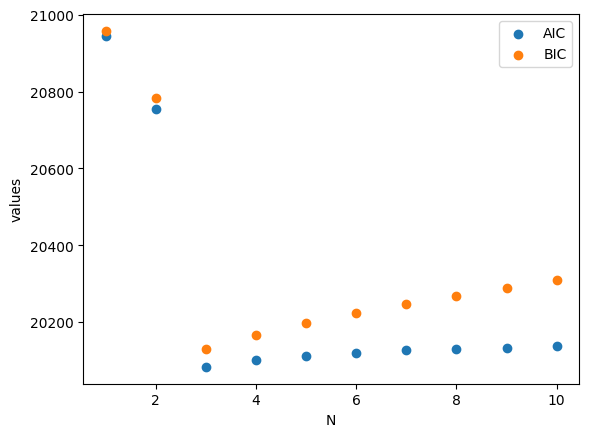

In [5]:
plt.scatter(range(1,11), AIC, label ="AIC")
plt.scatter(range(1,11), BIC , label ="BIC")
plt.xlabel("N")
plt.ylabel("values")
plt.legend()

best_n_AIC = np.argmin(AIC) + 1  # +1 because the index starts from 0
print(f"Optimal number of Gaussians from AIC: {best_n_AIC}")
best_n_BIC = np.argmin(BIC) + 1
print(f"Optimal number of Gaussians from BIC: {best_n_BIC}")


plt.show()

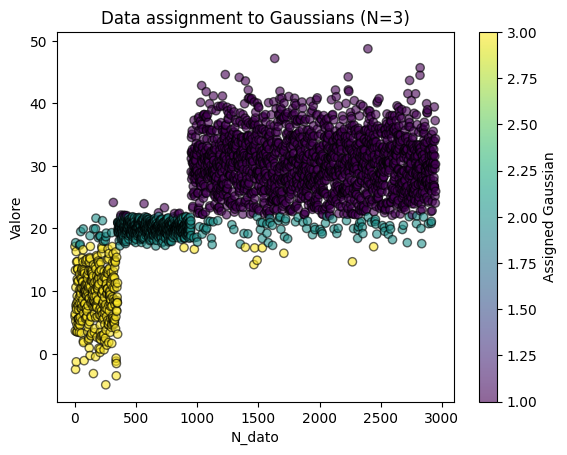

In [7]:
Number_gauss = best_n_AIC #number of gaussian for the mixture

gm = sklearn.mixture.GaussianMixture(n_components=Number_gauss, random_state=42)
gm.fit(data)

# Prediction of cluster assegnation
labels = gm.predict(data)

# Plot color data of appartenention
plt.scatter(range(len(data)), data, c=labels + 1, cmap="viridis", alpha=0.6, edgecolor="k")
plt.xlabel("N_dato")
plt.ylabel("Valore")
plt.title(f"Data assignment to Gaussians (N={Number_gauss})")
plt.colorbar(label="Assigned Gaussian")
plt.show()
